<a href="https://colab.research.google.com/github/tonqaow/229351-StatisticalLearning/blob/main/651610443_229351_LAB09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook หรือไฟล์ *.ipynb ที่กำหนดให้ จากนั้นบันทึกไว้เป็นไฟล์ *.pdf แล้วส่งใน Assignments

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/elecequip.csv

In [ ]:
# uploading the csv file to colab

!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2025-09-10 15:12:49--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 188.114.97.0, 188.114.96.0, 2a06:98c1:3121::, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|188.114.97.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-09-10 15:12:49 (45.6 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [ ]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('elecequip.csv', parse_dates=['time'],
                                        index_col='time',
                                        date_format='%Y-%m')

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


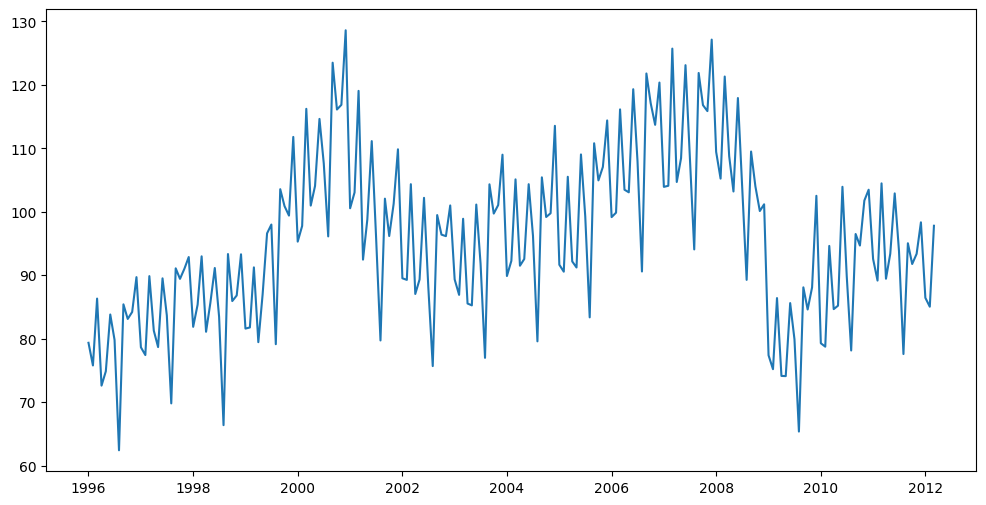

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data["value"]);

In [ ]:
# subsetting data at specified date

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [ ]:
# Add or change values

data.loc['2012-03-02','value'] = 86

data

,Unnamed: 0,value
time,,
1996-01-01,1.0,79.35
1996-02-01,2.0,75.78
1996-03-01,3.0,86.32
1996-04-01,4.0,72.60
1996-05-01,5.0,74.86
...,...,...
2011-12-01,192.0,98.34
2012-01-01,193.0,86.44
2012-02-01,194.0,85.04


# Moving average

In [ ]:
data['MA'] = data['value'].rolling(window=5,center=True).mean()
#data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)

data.head(12)

,Unnamed: 0,value,MA
time,,,
1996-01-01,1.0,79.35,NaN
1996-02-01,2.0,75.78,NaN
1996-03-01,3.0,86.32,77.782
1996-04-01,4.0,72.60,78.674
1996-05-01,5.0,74.86,79.478
1996-06-01,6.0,83.81,74.696
1996-07-01,7.0,79.80,77.258
1996-08-01,8.0,62.41,78.908
1996-09-01,9.0,85.41,78.988


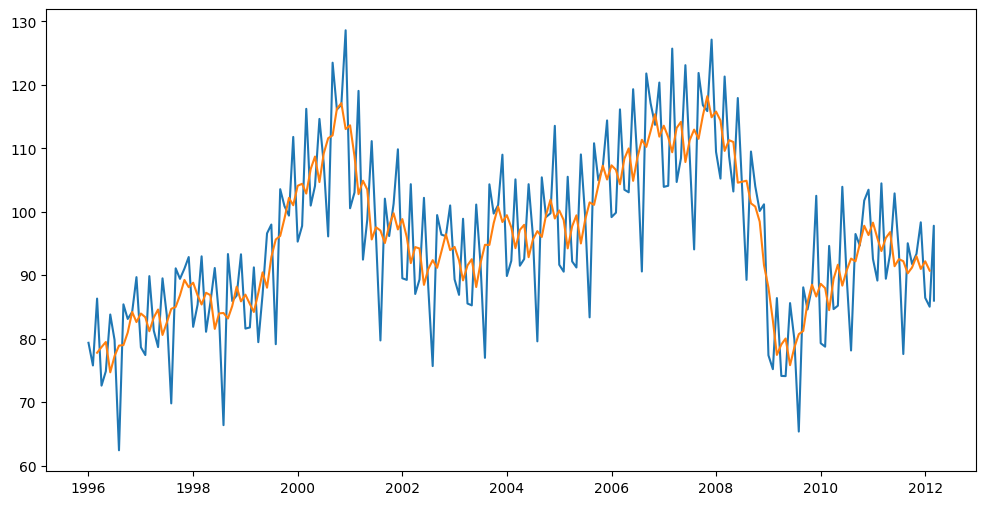

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['value'])
plt.plot(data['MA']);

# Classical decomposition

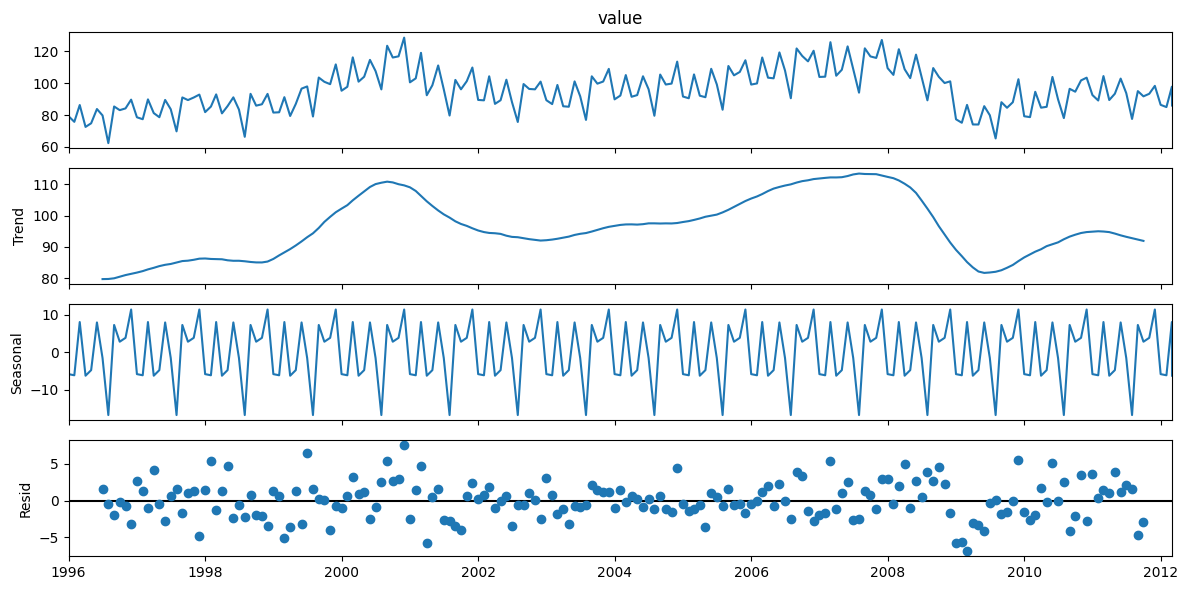

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(data['value'], model='additive', period=12)

result_add.plot();

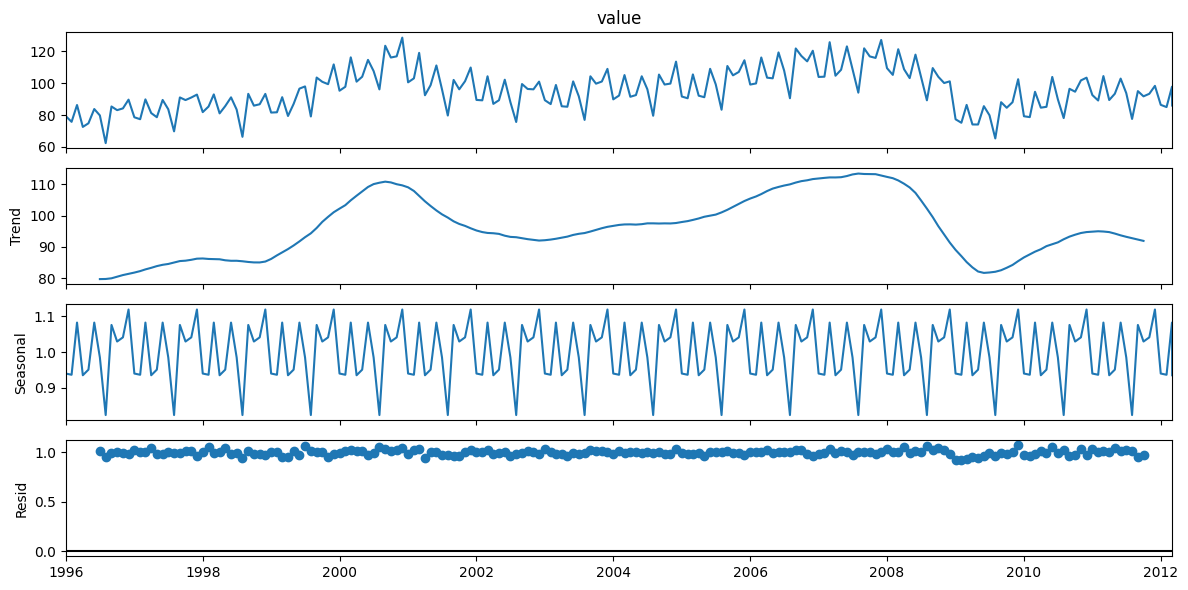

In [ ]:
result_mul = seasonal_decompose(data['value'], model='multiplicative', period=12)

result_mul.plot();

### เรียกดูแต่ละส่วน

In [ ]:
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-03-02   NaN
Name: trend, Length: 196, dtype: float64
time
1996-01-01    -5.870942
1996-02-01    -6.182553
1996-03-01     8.099891
1996-04-01    -6.298248
1996-05-01    -4.801748
                ...    
2011-12-01    11.464224
2012-01-01    -5.870942
2012-02-01    -6.182553
2012-03-01     8.099891
2012-03-02    -6.298248
Name: seasonal, Length: 196, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-03-02   NaN
Name: resid, Length: 196, dtype: float64
time
1996-01-01    79.35
1996-02-01    75.78
1996-03-01    86.32
1996-04-01    72.60
1996-05-01    74.86
              ...  
2011-12-01    98.34
2012-01-01    86.44
2012-02-01    85.04
2012-03-01    97.80
2012-03-02    86

### ปฏิบัติการครั้งที่ 7
1. สร้างโมเดลเพื่อการทำนายดังนี้
1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-03-01  
1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set
1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01  
3. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง
4. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

In [ ]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

train = data.loc['1996-01-01':'2009-12-01']
test = data.loc['2010-01-01':'2012-03-01']
#print(train)
#print(test)

In [ ]:
result = seasonal_decompose(train['value'], model='additive', period=12)

S_train = result.seasonal
T_train = result.trend
R_train = result.resid

In [ ]:
last_TR = (T_train + R_train).dropna().iloc[-1]

S_test = seasonal_decompose(data['value'], model='additive', period=12).seasonal.loc[test.index]
y_pred = S_test + last_TR

In [ ]:
rmse(test['value'],y_pred)

np.float64(14.553798739797461)

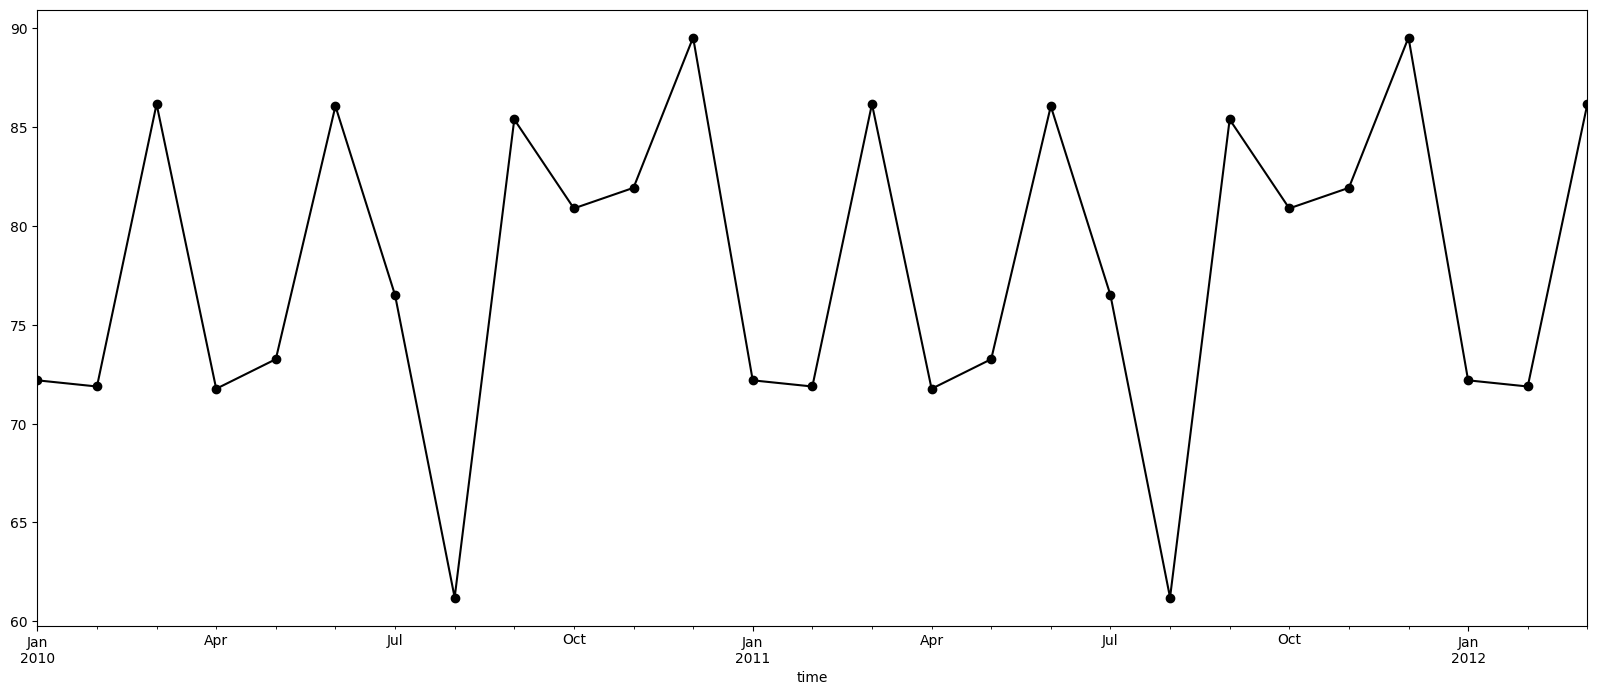

In [ ]:
ax = ts_new.plot(marker='o', color='black', figsize=(20,8))

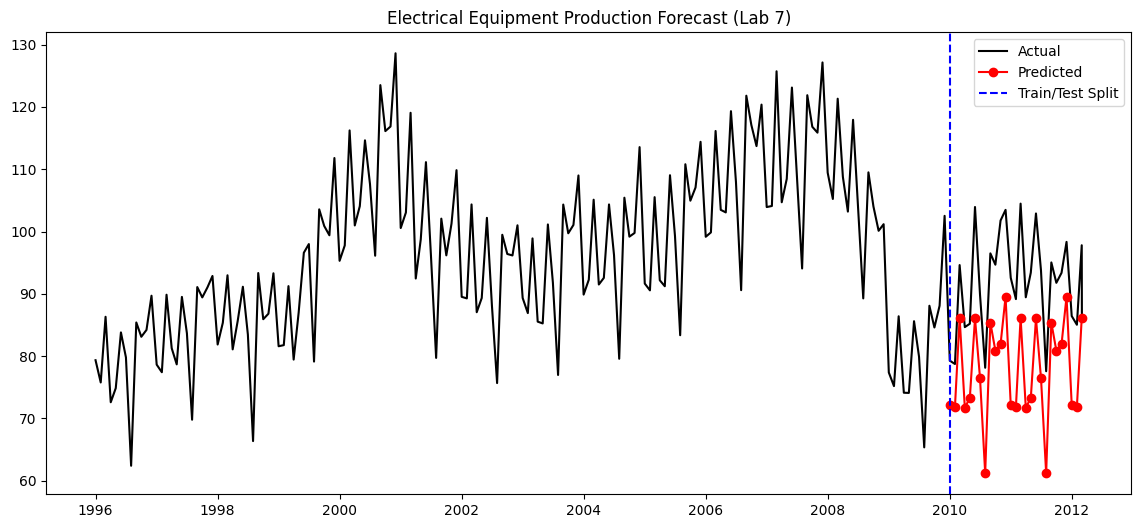

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14,6))
plt.plot(data.index, data['value'], label="Actual", color='black')
plt.plot(test.index, y_pred, label="Predicted", color='red', marker='o')
plt.axvline(pd.to_datetime('2010-01-01'), color='blue', linestyle='--', label='Train/Test Split') # Convert string to datetime object
plt.legend()
plt.title("Electrical Equipment Production Forecast (Lab 7)")
plt.show()